In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Space of Polynomials

### (c)

In [2]:
# This function generate the vandermonde matrix V in R^((n+1)*(n+1)) with uniformed spaced nodes
def Vander(n):
    nodes = np.zeros(n+1)
    for i in range(n+1):
        nodes[i] = -1+2*i/n
    return np.vander(nodes, increasing=True)
    
# Now we calculate condition numbers
for n in [5, 10, 20, 30]:
    V = Vander(n)
    K = np.linalg.cond(V, 2)
    print('The condition number for n =',n,'is K2(V) =',K)

The condition number for n = 5 is K2(V) = 63.827282596393026
The condition number for n = 10 is K2(V) = 13951.626931484087
The condition number for n = 20 is K2(V) = 831377050.2316139
The condition number for n = 30 is K2(V) = 56422327842514.77


## Question 2: Hermite Interpolation

### (d)

In [3]:
H0 = lambda x: (1-2*x)**2*(1+4*x)
H1 = lambda x: 4*x**2*(3-4*x)
K0 = lambda x: (1-2*x)**2*(x)
K1 = lambda x: 4*x**2*(x-1/2)

f = lambda x: 3*np.exp(x) # Note that derivative of f(x) equals to f(x)
y0, z0 = f(0), f(0)
y1, z1 = f(1/2),f(1/2)

p = lambda x: H0(x)*y0 + K0(x)*z0 + H1(x)*y1 + K1(x)*z1

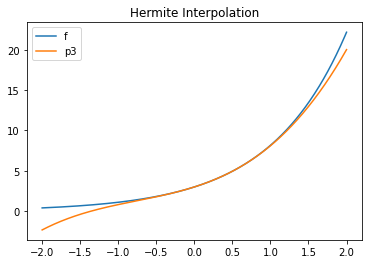

In [4]:
xs = np.linspace(-2,2,1000)

plt.figure()
plt.plot(xs, [f(x) for x in xs], label = 'f')
plt.plot(xs, [p(x) for x in xs], label = 'p3')
plt.title('Hermite Interpolation')
plt.legend()
plt.show()

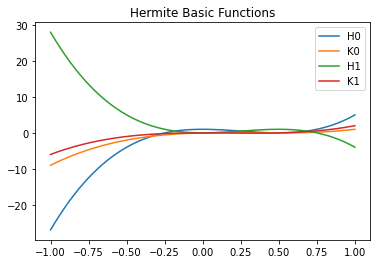

In [5]:
xs = np.linspace(-1,1,1000)

plt.figure()
plt.plot(xs, [H0(x) for x in xs], label = 'H0')
plt.plot(xs, [K0(x) for x in xs], label = 'K0')
plt.plot(xs, [H1(x) for x in xs], label = 'H1')
plt.plot(xs, [K1(x) for x in xs], label = 'K1')
plt.title('Hermite Basic Functions')
plt.legend()
plt.show()

## Question 4: Errors in Polynomial Interpolation

In [6]:
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

# Generate Chebyshev points on [-1,1]
def ChebyshevPoints(n):
    return np.array([np.cos((i + 1/2)*np.pi/(n + 1)) for i in range(n+1)])

def Poly(n, f):
    x = ChebyshevPoints(n)
    y = np.array([f(i) for i in x])
    poly = lagrange(x, y)
    return Polynomial(poly.coef[::-1])

def InfErrors(f, g):
    xs = np.linspace(-1, 1, 10000)
    errors = [abs(f(x)-g(x)) for x in xs]
    return max(errors)

def L2Errors(f, g):
    xs = np.linspace(-1, 1, 10000)
    approximate_integral = sum((f(x)-g(x))**2*(1/10000) for x in xs)
    return approximate_integral**(1/2)

In [7]:
import pandas as pd

ns = [2**i for i in range(1, 9)]
inf_error = []
L2_error = []

f = lambda x: 1 if x>= 0 else 0

for n in ns:
    pn = Poly(n, f)
    inf_error.append(InfErrors(pn, f))
    L2_error.append(L2Errors(pn, f))


data = {'n':[2**i for i in range(1, 9)],
       'Maximum Errors': inf_error,
       'L2-errors': L2_error}

df = pd.DataFrame(data)

df

,n,Maximum Errors,L2-errors
0,2,9.999423e-01,4.348415e-01
1,4,9.998948e-01,3.396864e-01
2,8,9.998042e-01,2.548845e-01
3,16,9.996262e-01,1.862989e-01
4,32,9.992717e-01,1.342072e-01
5,64,5.246496e+14,4.076474e+13
6,128,1.281717e+47,7.185693e+45
7,256,5.814192e+111,2.342360e+110


The Maximum Error fails to converge.
The L2-error appears to converge when n is relatively small, when n>32 the error blows up.

## Question 5: Composite Trapezoidal and Simpson Sum 

### (a)

In [8]:
def trapez(f, a, b, m):
    xs = np.linspace(a, b, m+1)
    h = (b-a)/m
    result = 0
    for i in range(m):
        result += (1/2)*(f(xs[i])+f(xs[i+1]))
    return h*result
    
    
def simpson(f, a, b, m):
    xs = np.linspace(a, b, m+1)
    
    def simple_simpson(f, a, b):
        return ((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))
    
    result = 0
    for i in range(m):
        result += simple_simpson(f, xs[i], xs[i+1])
    
    return result
    

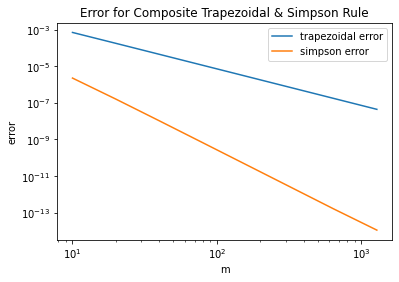

In [9]:
f = lambda x: x**(1/2)

a = 0.1
b = 1

I_exact = 2/3 - 1/(15*10**(1/2))

ms = [2**i*10 for i in range(8)]

error_trapez = []
error_simpson = []

for m in ms:
    error_trapez.append(abs(I_exact - trapez(f, a, b, m)))
    error_simpson.append(abs(I_exact - simpson(f, a, b, m)))
    
plt.figure()
plt.loglog(ms, error_trapez, label = 'trapezoidal error')
plt.loglog(ms, error_simpson, label = 'simpson error')
plt.title('Error for Composite Trapezoidal & Simpson Rule')
plt.xlabel('m')
plt.ylabel('error')
plt.legend()
plt.show()

### (b)

In [10]:
log_error_t = np.log(error_trapez)
log_error_s = np.log(error_simpson)

A = np.vstack([np.log(ms), np.ones(len(ms))]).T

K_t, D_t = np.linalg.lstsq(A, log_error_t, rcond=None)[0]
K_s, D_s = np.linalg.lstsq(A, log_error_s, rcond=None)[0]

data = {'Trapezoidal Rule': [D_t, K_t],
       'Simpson Rule': [D_s, K_s]}

pd.DataFrame(data, index = ['D','K'])

,Trapezoidal Rule,Simpson Rule
D,-2.628937,-3.793797
K,-1.998076,-3.965943


In [11]:
# Now we compare with the K we get from the theoretical estimated error

theo_err_t = []
M2 = 1/(4*0.1**(3/2))
for m in ms:
    err = (b-a)**3*M2/(12*m**2)
    theo_err_t.append(err)

theo_err_s = []
M4 = 15/(16*0.1**(7/2))
for m in ms:
    err = (b-a)**5*M4/(2880*m**4)
    theo_err_s.append(err)
    
Ktt, Dtt = np.linalg.lstsq(A, np.log(np.array(theo_err_t)), rcond=None)[0]
Kts, Dts = np.linalg.lstsq(A, np.log(np.array(theo_err_s)), rcond=None)[0]

data2 = {'Numerical K':[K_t,K_s],
        'Theoretical K':[Ktt, Kts]}
pd.DataFrame(data2, index=['Composite Trapezoidal Rule', 'Composite Simpson Rule'])

,Numerical K,Theoretical K
Composite Trapezoidal Rule,-1.998076,-2.0
Composite Simpson Rule,-3.965943,-4.0


### (c)

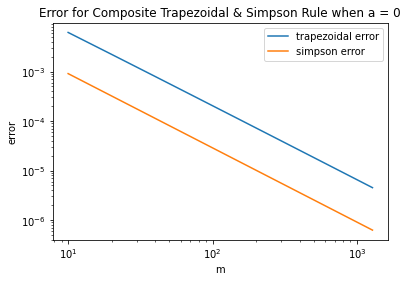

In [12]:
a_new = 0
I = 2/3

err_t = []
err_s = []

for m in ms:
    err_t.append(abs(I - trapez(f, a_new, b, m)))
    err_s.append(abs(I - simpson(f, a_new, b, m)))
    
plt.figure()
plt.loglog(ms, err_t, label = 'trapezoidal error')
plt.loglog(ms, err_s, label = 'simpson error')
plt.title('Error for Composite Trapezoidal & Simpson Rule when a = 0')
plt.xlabel('m')
plt.ylabel('error')
plt.legend()
plt.show()

In [13]:
log_error_t = np.log(err_t)
log_error_s = np.log(err_s)

A = np.vstack([np.log(ms), np.ones(len(ms))]).T

K_t, D_t = np.linalg.lstsq(A, log_error_t, rcond=None)[0]
K_s, D_s = np.linalg.lstsq(A, log_error_s, rcond=None)[0]

data = {'Trapezoidal Rule': [D_t, K_t],
       'Simpson Rule': [D_s, K_s]}

pd.DataFrame(data, index = ['D','K'])

,Trapezoidal Rule,Simpson Rule
D,-1.651699,-3.550762
K,-1.488356,-1.499998


The theoretical estimates fail when a=0, because when a=0, the second/forth order derivative at x=0 blows up, i.e., we fail to find M2 and M4.